In [41]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

def clean_list(skills_list):
    if pd.notna(skills_list):
        return ast.literal_eval(skills_list)

df['job_skills'] = df['job_skills'].apply(clean_list)

In [42]:
df_copy = df[df['job_title_short'] == 'Data Analyst'].copy()

In [43]:
df_exploded = df_copy.explode('job_skills').copy()

In [44]:
skills_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

In [45]:
skills_stats = skills_stats.sort_values(by='skill_count', ascending=False).head(20)

In [46]:
from adjustText import adjust_text

<Axes: xlabel='skill_count'>

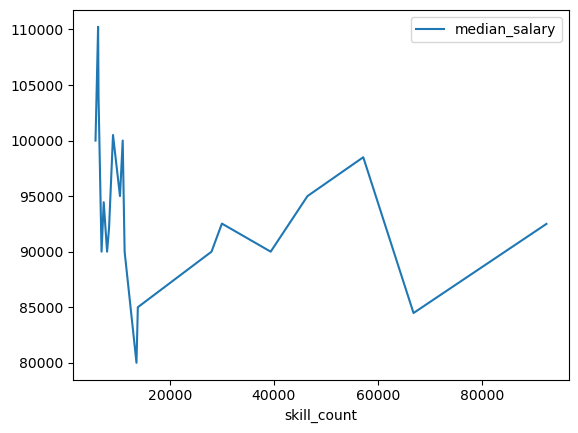

In [47]:
skills_stats.plot(kind='line', x='skill_count', y='median_salary')

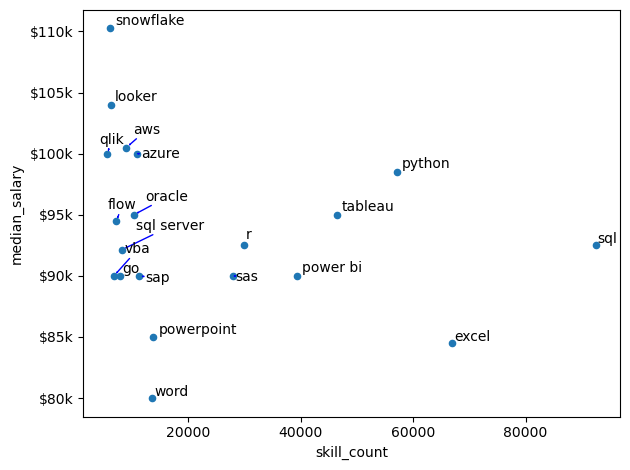

In [48]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
texts = []
for index, name in enumerate(skills_stats.index):
    text = plt.text(skills_stats['skill_count'].iloc[index], skills_stats['median_salary'].iloc[index], name)
    texts.append(text)

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='blue', lw=1.0))
plt.tight_layout()

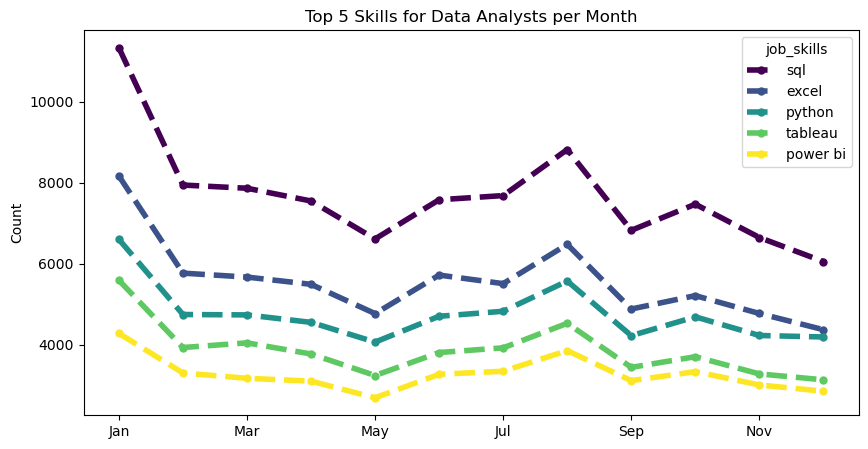

In [49]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)
# Create a total row
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
# Order columns by total count
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
# Drop total row
df_DA_pivot = df_DA_pivot.drop('Total')
# code snippet from `6_Exercise_Job_Demand.ipynb`
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='--',
    colormap='viridis',
    marker='o',
    markersize=5,
    figsize=(10,5)
    )

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [50]:
df_DA_US = df[(df['job_title_short'] =='Data Analyst') & (df['job_country'] == 'United States')].copy()

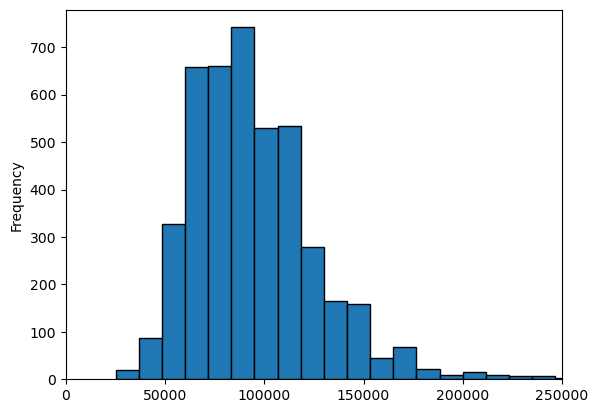

In [51]:
df_DA_US['salary_year_avg'].plot(kind='hist', edgecolor='black', bins=30)
plt.xlim(0, 250000)
plt.show()

In [52]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

<Axes: >

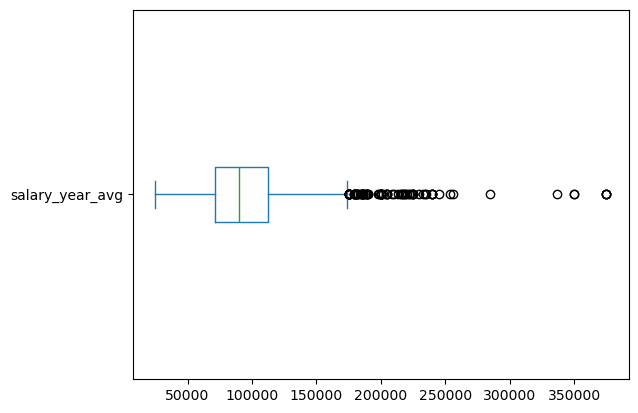

In [53]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

In [54]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [55]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_box = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

In [56]:
df_box = df_box.dropna(subset=['salary_year_avg'])
df_box['job_title_short'].unique()

array(['Data Engineer', 'Data Scientist', 'Data Analyst'], dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x25e0422ccd0>,
 'caps': [<matplotlib.lines.Line2D at 0x25e0422e0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e0422c3d0>,
 'medians': [<matplotlib.lines.Line2D at 0x25e0422f1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x25e04409010>,
 'means': []}

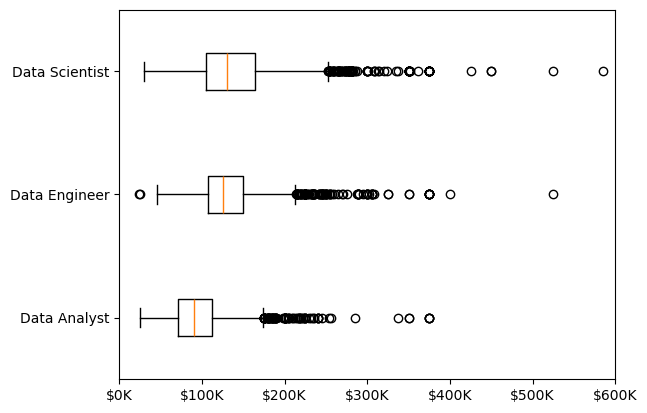

In [59]:
job_list = [df_box[df_box['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.boxplot(job_list, tick_labels=job_titles, vert=False)